## Final Project Submission

Please fill out:
* Student name: Irene Ngina Kibengo
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:


# Identifying Low-Risk Aircraft Models For New Aviation Ventures


# Business Understanding
The aviation industry is inherently high-risk, making safety a crucial consideration when selecting aircraft for a new business venture. This project aims to support aviation entrepreneurs and startups by providing a data-driven analysis of historical accident data to identify aircraft types associated with lower safety risks. By leveraging these insights, stakeholders can make more informed decisions regarding fleet selection, ultimately enhancing operational safety and reducing potential liabilities. By uncovering patterns in past accidents, the project provides actionable insights to guide safe and strategic fleet choices.

## Stakeholders

The primary stakeholder for this project is the head of aviation  division, who is responsible for overseeing fleet decisions, operational safety, and long-term strategic planning. This project provides data-driven insights that support informed decision-making around aircraft selection, helping minimize operational risk and ensure compliance with safety standards. By identifying aircraft models with lower historical accident rates, the project aims to enhance fleet safety while reducing the financial and reputational risks associated with high-risk aircraft.

## Conclusion: Implications
This project highlights how historical aviation accident data can be leveraged to generate actionable insights that inform aviation business strategy. By identifying aircraft models associated with lower incident rates, the analysis supports more informed and safety-conscious fleet selection. These insights not only enhance passenger safety but also promote long-term financial sustainability by helping aviation startups avoid high-risk investments.


# Data Understanding



## Data Source 
This data comes from Aviation Accident Database(Synopses) kaggle. It was compiled from the U.S. National Transportation Safety Board (NTSB) accident reports and contains summaries of aviation incidents and accidents. This dataset is highly suitable for the goal of identifying aircraft types associated with lower safety risks.It provides real-world records of aviation incidents, allowing for pattern analysis across aircraft models, manufacturers, and operational contexts. Because the data is derived from authoritative sources like the NTSB, it is credible and relevant for safety-focused fleet decisions.

## Load the Dataset

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


# Loading the dataset
df= pd.read_csv('data/Aviation_Data.csv')

# Shows the first few rows 
df.head()


C:\Users\USER\AppData\Local\Temp\ipykernel_25552\1963846043.py:7: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('data/Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


The first step is loading the Aviation accident dataset .It contains historical records of aircraft incidents compiled from NTSB reports. This dataset will serve as the basis for identifying aircraft models associated with lower safety risk.

## Dataset Overview

In [28]:
# Dataset shape and summary
df.shape


(90348, 31)

The dataset has 90348 rows and 31 columns.

In [31]:
# Dataset summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The .info() method provides a concise summary of the DataFrame. In this aviation dataset, there are 90,348 rows and 31 columns. Among these, 5 columns are of float data type, while the remaining 26 columns are of object data type, typically representing strings or mixed data.

In [35]:
# finding missing values 
df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

The .isnull().sum() method helps detect missing data by returning the count of null (or missing) values in each column of the aviation dataset.

## Top 10 Aircrafts Makes by Accident Frequency

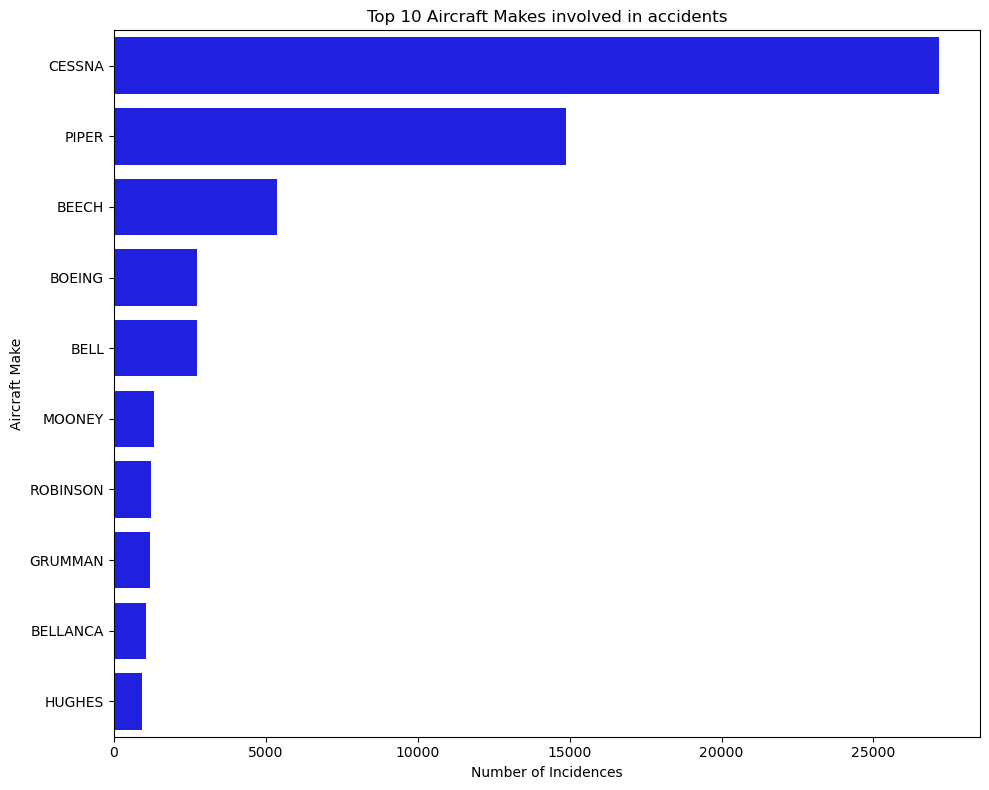

In [65]:
# Clean and standardize the Make column to remove extra white spaces or different capitalization
df['Make']= df['Make'].str.upper().str.strip()

# Top 10 Aircraft makes by frequency
top_makes = df['Make'].value_counts().head(10)

#Plotting
plt.figure(figsize= (10,8))
sns.barplot(x= top_makes.values, y= top_makes.index, color="blue")
plt.title("Top 10 Aircraft Makes involved in accidents")
plt.xlabel("Number of Incidences")
plt.ylabel("Aircraft Make")
plt.tight_layout()
plt.show();

This chart displays the top 10 Aircraft manufactures most frequently involved in reported incidents. Cessna has the most leading incidences of over 20000 incidences while Piper, Bell, Boeing, Grumman and  Mooney manufactures have less than 5000 reported incidences. The Make column was standardized by converting all values to uppercase and removing leading/trailing whitespace. This ensures that different variations of the same manufacturer (like "Cessna", "CESSNA", or "CESSNA ") are treated consistently, avoiding duplicate entries in the analysis. 

## Most Frequently Involved Aircraft Models

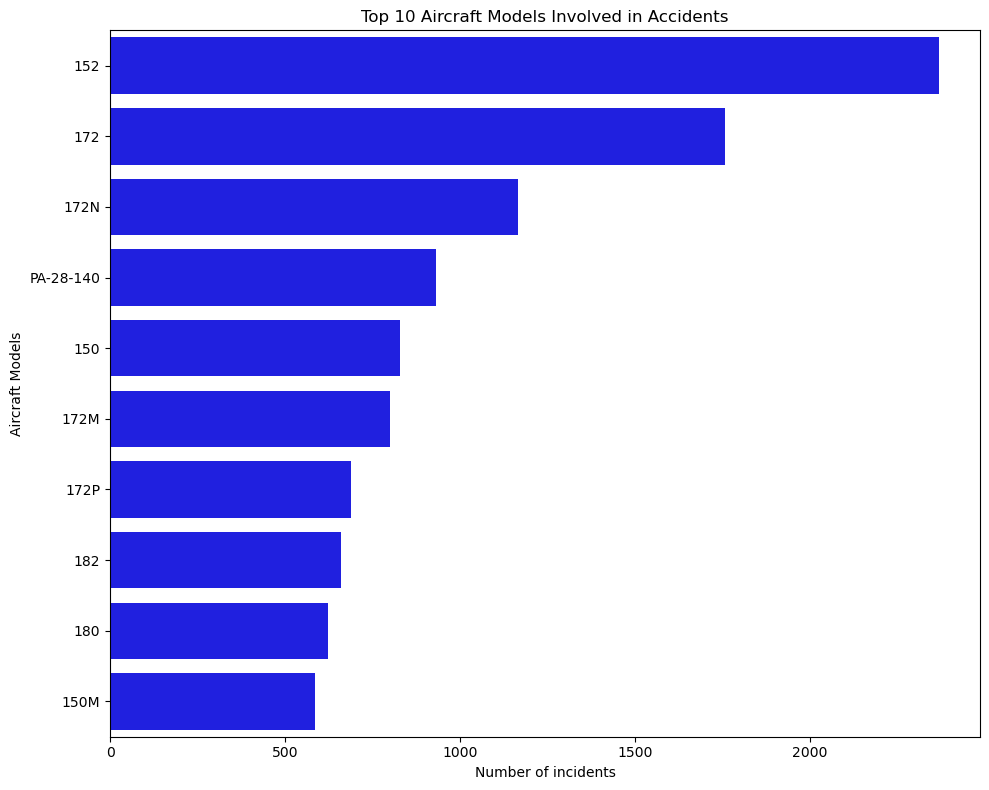

In [62]:
#Top 10 Models involved in Accidents 

top_models = df['Model'].value_counts().head(10)

#Plot graph for the top_models
plt.figure(figsize=(10,8))
sns.barplot(x= top_models.values, y=top_models.index, color="blue")
plt.title("Top 10 Aircraft Models Involved in Accidents")
plt.xlabel("Number of incidents")
plt.ylabel("Aircraft Models")
plt.tight_layout()
plt.show();

This chart highlights the Aircraft Models with the highest number of recorded incidents. Aircraft Model 152 records of over 2000 incidents while model number 150M has a low incident of over 500.

## Trends in Accidents over time

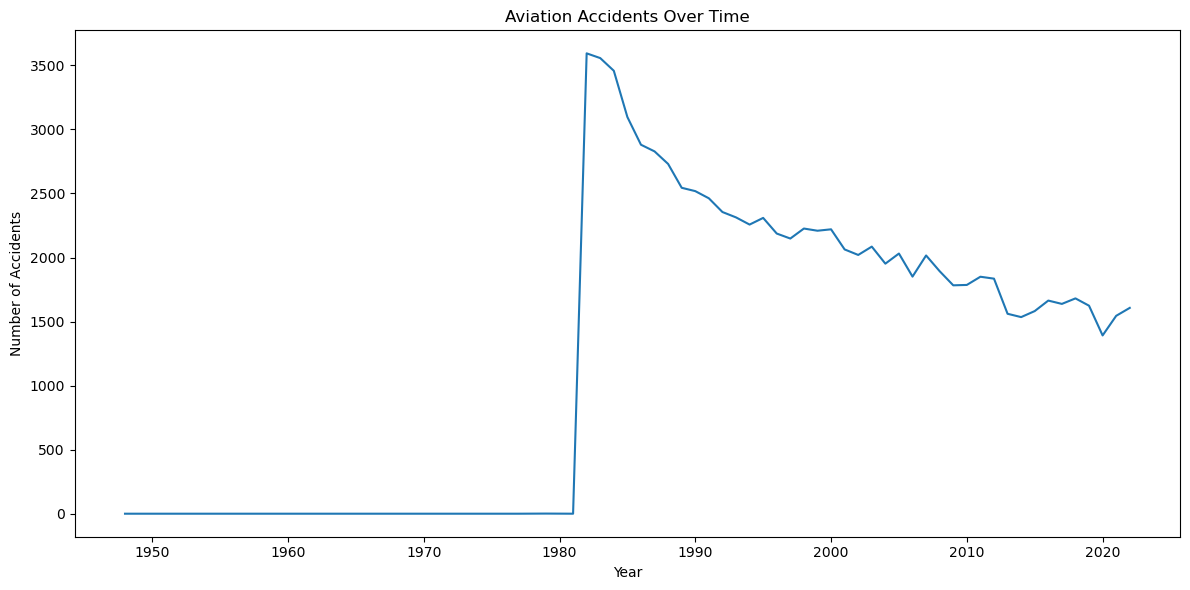

In [107]:
# Parse dates and extract year
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year

# Count accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title("Aviation Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()


The analyzing of accident trends over time shows whether the number of accidents have improved. The chart shows that their is a decline as the year progresses in the number of accidents.